## Download the data

In [56]:
import os
import matplotlib.pyplot as plt

IMAGE_PATH = r"E:\IITM BS_DS\Hands-On ML\Household_Prediction1\images"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [1]:
import os
import tarfile
import urllib.request

# Get the housing data from the URL
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
HOUSING_PATH = os.path.join("datasets", "housing")

def fetch_housing_data(houseing_url, housing_path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(houseing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data(HOUSING_URL, HOUSING_PATH)

C:\Users\abhij\AppData\Local\Temp\ipykernel_6276\2819865718.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Quick look of the data

In [4]:
# Overview of data schama 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# view of categorical data
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
# General statistics of the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Matplotlib is building the font cache; this may take a moment.


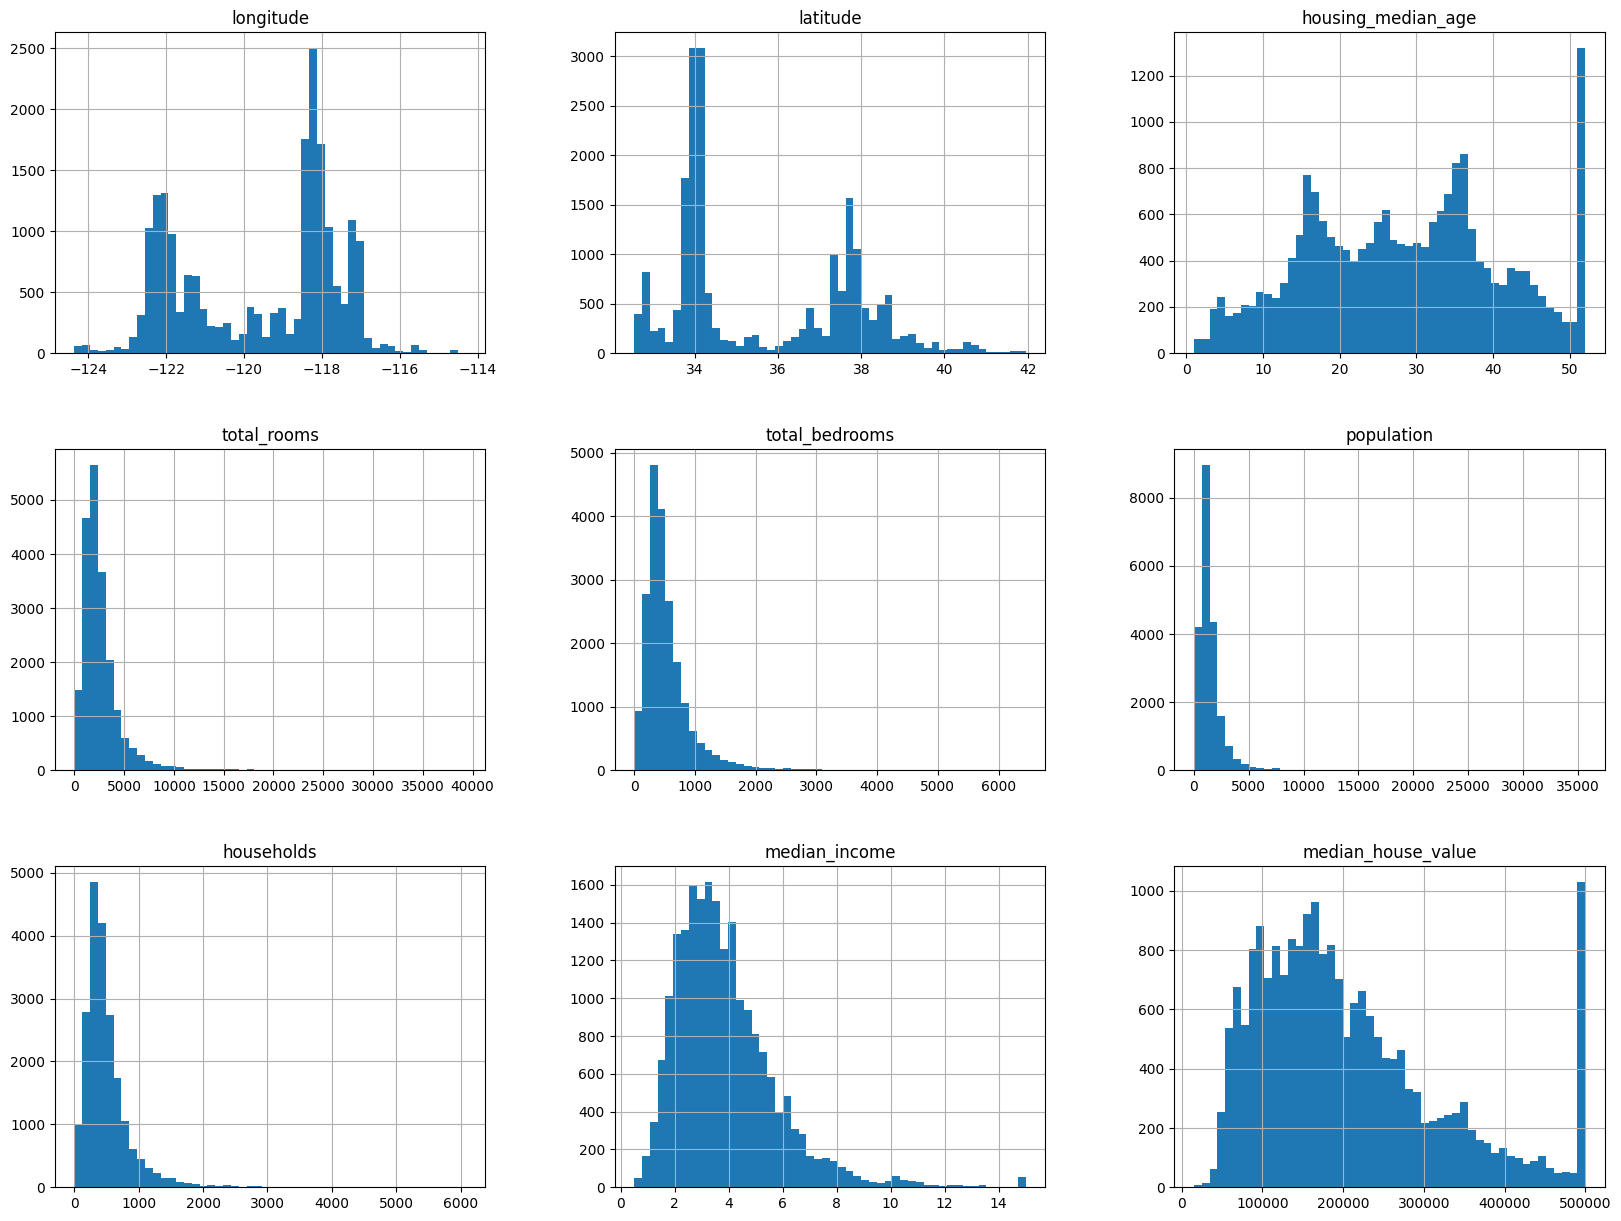

In [7]:
import matplotlib.pyplot as plt

# Plotting the histogram of the data
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Create a Test set

In [39]:
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [40]:
# Split the data into train and test sets
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
# Check the data split
train_set.head(), test_set.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 8701     -118.35     33.86                28.0       2075.0           463.0   
 16674    -120.66     35.20                13.0       5138.0           713.0   
 4324     -118.35     34.08                52.0       1710.0           350.0   
 5756     -118.29     34.18                52.0       1602.0           265.0   
 3243     -119.57     36.10                16.0       1461.0           400.0   
 
        population  households  median_income  median_house_value  \
 8701       1216.0       446.0         3.9732            281500.0   
 16674      1838.0       645.0         5.9676            380000.0   
 4324        727.0       355.0         4.5833            333900.0   
 5756        667.0       251.0         5.0490            323500.0   
 3243       1201.0       384.0         1.5727             54800.0   
 
       ocean_proximity income_cat  
 8701        <1H OCEAN          3  
 16674      NEAR OCEAN        

In [41]:
from zlib import crc32

# Function to create a unique identifier for each row of data
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Add a unique identifier to the data
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Check the data split
train_set.head(), test_set.head()

(   index  longitude  latitude  housing_median_age  total_rooms  \
 0  12655    -121.46     38.52                29.0       3873.0   
 1  15502    -117.23     33.09                 7.0       5320.0   
 2   2908    -119.04     35.37                44.0       1618.0   
 3  14053    -117.13     32.75                24.0       1877.0   
 4  20496    -118.70     34.28                27.0       3536.0   
 
    total_bedrooms  population  households  median_income  median_house_value  \
 0           797.0      2237.0       706.0         2.1736             72100.0   
 1           855.0      2015.0       768.0         6.3373            279600.0   
 2           310.0       667.0       300.0         2.8750             82700.0   
 3           519.0       898.0       483.0         2.2264            112500.0   
 4           646.0      1837.0       580.0         4.4964            238300.0   
 
   ocean_proximity income_cat  
 0          INLAND          2  
 1      NEAR OCEAN          5  
 2          

In [43]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
8,17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,181300.0,<1H OCEAN,2
10,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND,2
16,7667,-118.08,33.93,39.0,1478.0,324.0,1127.0,320.0,3.5250,158000.0,<1H OCEAN,3
17,10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,276800.0,<1H OCEAN,2
19,11063,-117.86,33.79,42.0,1024.0,191.0,483.0,187.0,4.1050,194500.0,<1H OCEAN,3


In [ ]:
# split the data by geographical location
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

# Check the data split
train_set.head(), test_set.head()

In [44]:
from sklearn.model_selection import train_test_split

# Using sklearn to split the data into train and test sets
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Check the data split
train_set.head(), test_set.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 16674    -120.66     35.20                13.0       5138.0           713.0   
 4324     -118.35     34.08                52.0       1710.0           350.0   
 5756     -118.29     34.18                52.0       1602.0           265.0   
 3243     -119.57     36.10                16.0       1461.0           400.0   
 8155     -118.10     33.82                36.0       1946.0           346.0   
 
        population  households  median_income  median_house_value  \
 16674      1838.0       645.0         5.9676            380000.0   
 4324        727.0       355.0         4.5833            333900.0   
 5756        667.0       251.0         5.0490            323500.0   
 3243       1201.0       384.0         1.5727             54800.0   
 8155        871.0       336.0         5.2155            254800.0   
 
       ocean_proximity income_cat  
 16674      NEAR OCEAN          4  
 4324        <1H OCEAN        

<Axes: >

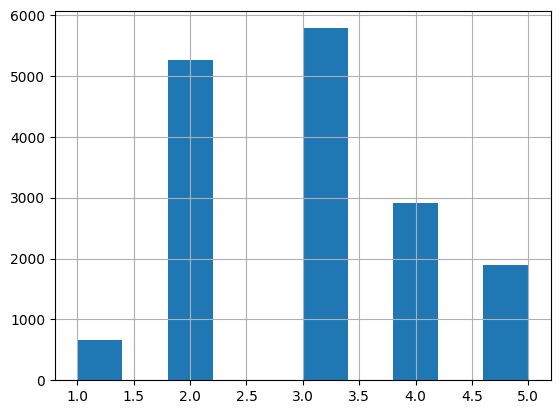

In [45]:
# checking of categorical representation of data
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3., 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

# Check the categorical representation of data
housing["income_cat"].hist()

In [49]:
# Stratified sampling of the data
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]


# Check the data split
# strat_train_set["income_cat"].value_counts() / len(strat_train_set), strat_test_set["income_cat"].value_counts() / len(strat_test_set)

In [50]:
# For comparing the proportions of the data in random and stratified sampling
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
print(compare_props)

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039789    0.039964  0.038753     -2.605214       0.438373
2           0.318859    0.318801  0.315471     -1.062610      -0.018165
3           0.350594    0.350590  0.356343      1.639851      -0.000894
4           0.176296    0.176203  0.174992     -0.739436      -0.052512
5           0.114462    0.114441  0.114441     -0.018165      -0.018165


In [ ]:
# remove the income_cat column to get back to the original data
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and Visuaalize the Data to Gain Insights

### Visualizing Geographical Data

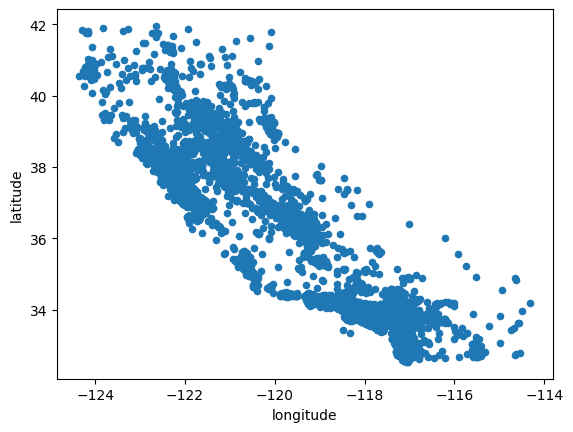

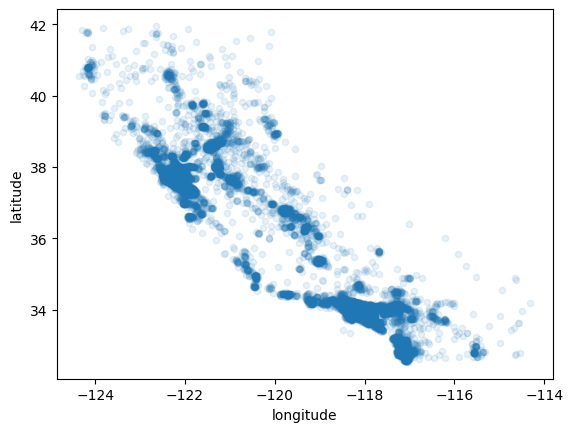

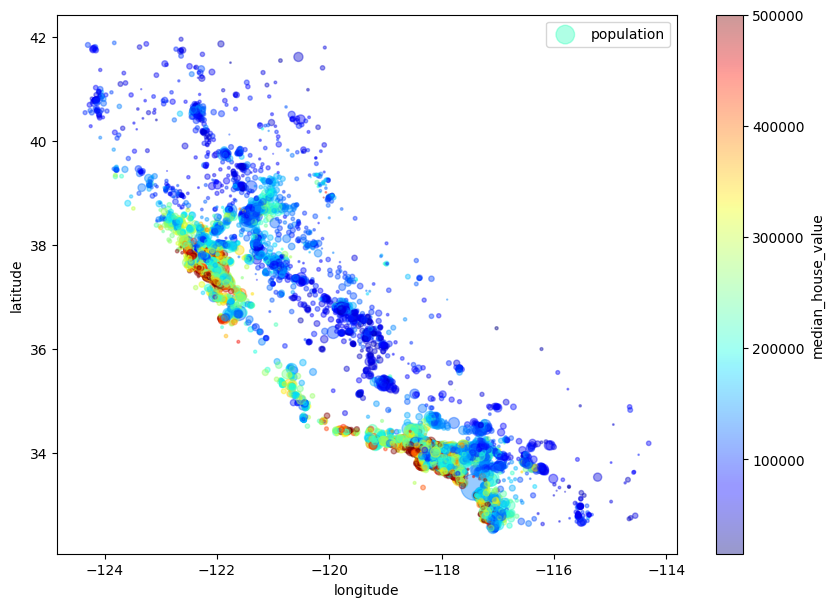

In [51]:
# Creating a copy of the data to avoid changing the original data
housing = strat_train_set.copy()

# Goegraphical scatter plot of the data
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

# scatter plot of the data with alpha value
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

# scatter plot of the data with color representation of the price
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
              s=housing["population"]/100, label="population", figsize=(10, 7), 
              c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [57]:
# Download the California image
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(IMAGE_PATH, filename))

('E:\\IITM BS_DS\\Hands-On ML\\Household_Prediction1\\images\\california.png',
 <http.client.HTTPMessage at 0x24ff097ee70>)

Saving figure california_housing_prices_plot


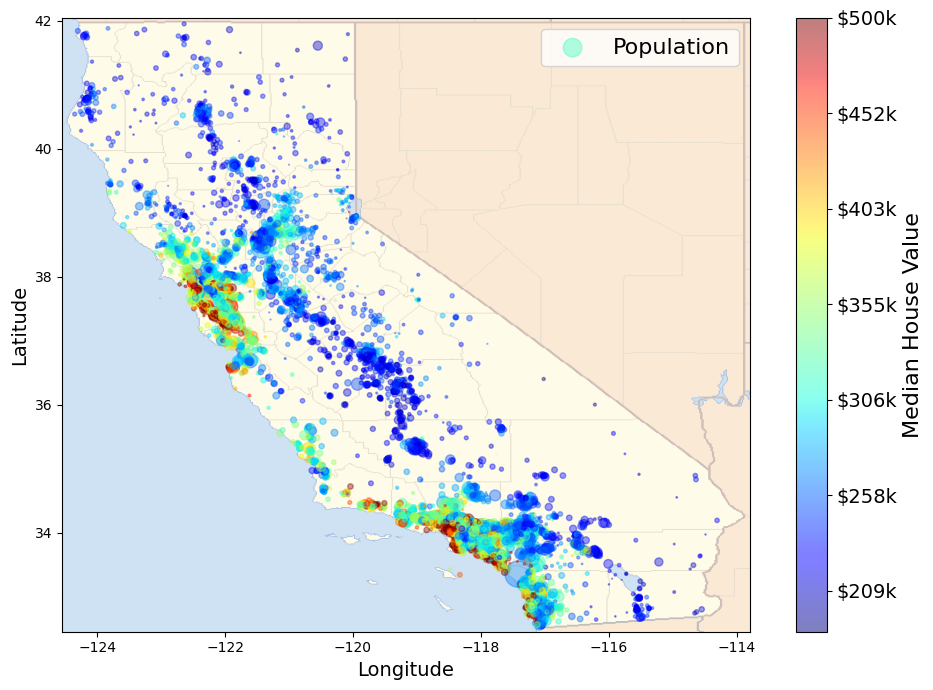

In [58]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(IMAGE_PATH, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

### Looking for Correlations

In [28]:
# findind the corr. matrix
corr_mat = housing.corr(numeric_only=True)
corr_mat["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

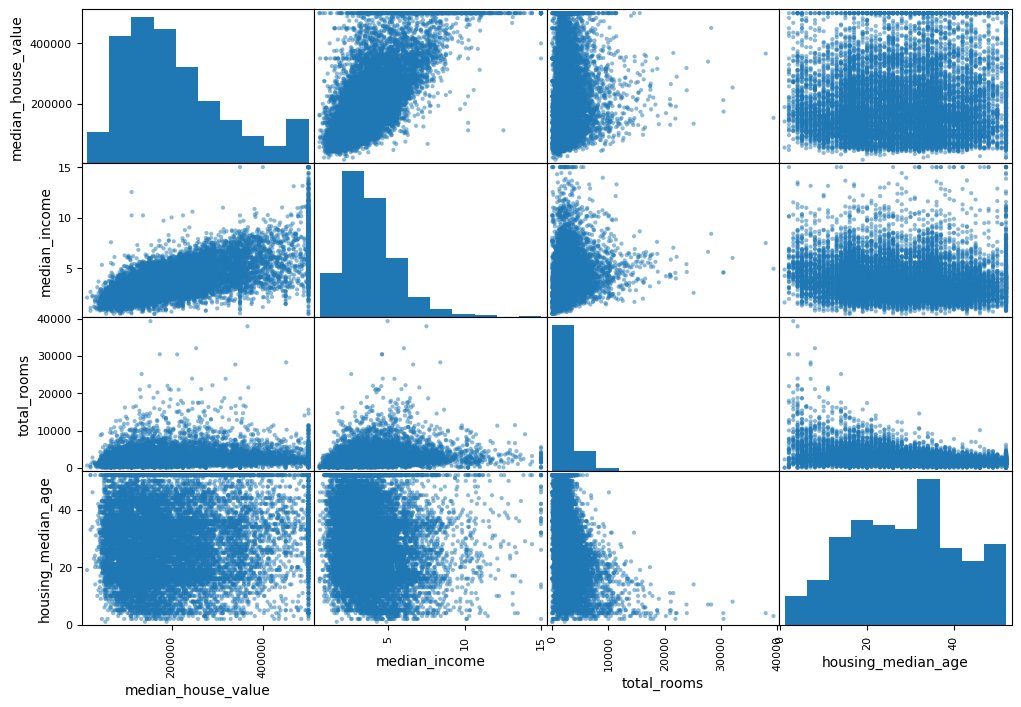

In [ ]:
from pandas.plotting import scatter_matrix

# scatter matrix of the some promising attributes
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

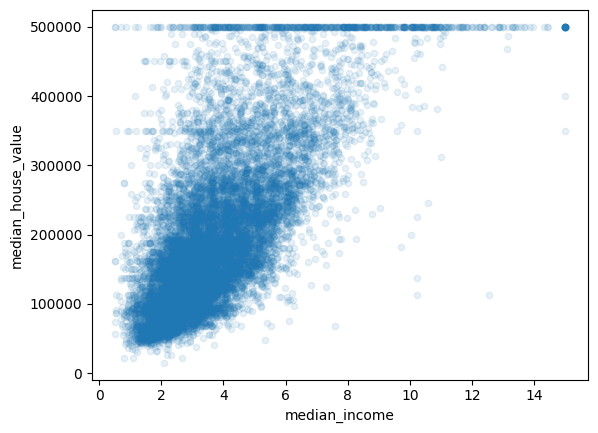

In [ ]:
# scatter plot of the median_income and median_house_value as they are highly correlated
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

### Experimenting with Attribute Combinations

In [62]:
# Let's combine some attributes and check the correlations again
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689127
rooms_per_household         0.159831
total_rooms                 0.137820
housing_median_age          0.113667
households                  0.066564
total_bedrooms              0.049841
population_per_household   -0.020827
population                 -0.023055
longitude                  -0.049097
latitude                   -0.140593
bedrooms_per_room          -0.271023
Name: median_house_value, dtype: float64

## Prepare the Data for Machine Learing Algorithems

In [66]:
# divide the data into features and labels
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()
# check the data
housing.head(), housing_labels.head()

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 3465     -118.46     34.31                24.0       2920.0           601.0   
 15290    -117.31     33.11                 7.0       7974.0          1703.0   
 10779    -117.91     33.65                17.0       1328.0           377.0   
 14038    -117.14     32.75                37.0       1832.0           525.0   
 1100     -121.75     39.88                16.0       2867.0           559.0   
 
        population  households  median_income ocean_proximity  
 3465       1460.0       598.0         4.2708       <1H OCEAN  
 15290      2904.0      1550.0         4.1282      NEAR OCEAN  
 10779       762.0       344.0         2.2222       <1H OCEAN  
 14038       955.0       488.0         2.7852      NEAR OCEAN  
 1100       1203.0       449.0         2.7143          INLAND  ,
 3465     218200.0
 15290    188100.0
 10779    276800.0
 14038    129200.0
 1100      95300.0
 Name: median_house_value, dtype: floa

### Data Cleaning

In [ ]:
# Ways to handle missing values
# 1. Drop the rows with missing values
housing.dropna(subset=["total_bedrooms"])
# 2. Drop the columns with missing values
housing.drop("total_bedrooms", axis=1)
# 3. Set the missing values to some value (mean, median, etc.)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [68]:
# Delaing with missing values using sklearn
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

# Check the imputer statistics
print(imputer.statistics_)

X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)
# Check the transformed data
housing_tr.head()

[-118.5      34.26     29.     2108.      431.     1161.      407.
    3.5363]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143


### Handling Text and Categorical Attributes

In [69]:
# view of non-numerical data
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3465,<1H OCEAN
15290,NEAR OCEAN
10779,<1H OCEAN
14038,NEAR OCEAN
1100,INLAND
15524,<1H OCEAN
4288,<1H OCEAN
13540,INLAND
14362,NEAR OCEAN
9739,<1H OCEAN


In [71]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding the categorical data using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# Check the encoded data
print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[0.]
 [4.]
 [0.]
 [4.]
 [1.]
 [0.]
 [0.]
 [1.]
 [4.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [72]:
from sklearn.preprocessing import OneHotEncoder
# Encoding the categorical data using OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat_1hot = onehot_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(housing_cat_1hot.toarray())
print(onehot_encoder.categories_)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13209 stored elements and shape (13209, 5)>
  Coords	Values
  (0, 0)	1.0
  (1, 4)	1.0
  (2, 0)	1.0
  (3, 4)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 4)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 4)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 4)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (13184, 1)	1.0
  (13185, 4)	1.0
  (13186, 4)	1.0
  (13187, 1)	1.0
  (13188, 0)	1.0
  (13189, 1)	1.0
  (13190, 1)	1.0
  (13191, 1)	1.0
  (13192, 1)	1.0
  (13193, 0)	1.0
  (13194, 1)	1.0
  (13195, 1)	1.0
  (13196, 3)	1.0
  (13197, 1)	1.0
  (13198, 3)	1.0
  (13199, 0)	1.0
  (13200, 4)	1.0
  (13201, 4)	1.0
  (13202, 1)	1.0
  (13203, 4)	1.0
  (13204, 0)	1.0
  (13205, 0)	1.0
  (13206, 4)	1.0
  (13207, 1)	1.0
  (13208, 0)	1.0
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0

In [74]:
pd.DataFrame(housing_cat_1hot.toarray(), columns=onehot_encoder.get_feature_names_out(), index=housing.index).head(10)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3465,1.0,0.0,0.0,0.0,0.0
15290,0.0,0.0,0.0,0.0,1.0
10779,1.0,0.0,0.0,0.0,0.0
14038,0.0,0.0,0.0,0.0,1.0
1100,0.0,1.0,0.0,0.0,0.0
15524,1.0,0.0,0.0,0.0,0.0
4288,1.0,0.0,0.0,0.0,0.0
13540,0.0,1.0,0.0,0.0,0.0
14362,0.0,0.0,0.0,0.0,1.0
9739,1.0,0.0,0.0,0.0,0.0


### Custom Transformers

In [75]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# Custom transformer to add extra features to the data
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [80]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
# Check the transformed data with extra attributes
housing_extra_attribs = attr_adder.transform(housing.values)
pd.DataFrame(housing_extra_attribs, columns=list(housing.columns) + ["rooms_per_household", "population_per_household"], index=housing.index).head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708,<1H OCEAN,4.882943,2.441472
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN,5.144516,1.873548
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,<1H OCEAN,3.860465,2.215116
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,NEAR OCEAN,3.754098,1.956967
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,INLAND,6.385301,2.679287
15524,-117.04,33.15,15.0,13814.0,2888.0,6583.0,2789.0,2.8247,<1H OCEAN,4.95303,2.360344
4288,-118.3,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,<1H OCEAN,2.500409,3.232216
13540,-117.3,34.14,39.0,1781.0,335.0,841.0,320.0,1.9432,INLAND,5.565625,2.628125
14362,-117.22,32.73,38.0,3966.0,768.0,1640.0,729.0,3.8409,NEAR OCEAN,5.440329,2.249657
9739,-121.75,36.76,32.0,1740.0,399.0,1563.0,389.0,2.7694,<1H OCEAN,4.473008,4.017995


### Feature Scaling & Transformation Pipelines

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Creating a pipeline to preprocess the data
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler()),
])

# Check the pipeline
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[ 5.54905849e-01, -6.18479947e-01, -3.77556497e-01, ...,
        -2.22250202e-01, -5.33762863e-02, -1.18905203e-01],
       [ 1.12916597e+00, -1.17924857e+00, -1.72641964e+00, ...,
        -1.17823670e-01, -9.72691943e-02, -1.10200840e-03],
       [ 8.29551995e-01, -9.26902690e-01, -9.32970734e-01, ...,
        -6.30449213e-01, -7.08705395e-02,  1.06812572e+00],
       ...,
       [ 1.18409520e+00, -1.30074844e+00, -5.36246279e-01, ...,
         2.34014082e-01, -6.95379836e-02, -5.07990265e-01],
       [-1.37261074e+00,  1.26944109e+00, -6.94936061e-01, ...,
         4.06716034e-01, -3.06651987e-03, -8.59364853e-01],
       [-1.55737269e+00,  1.31149873e+00,  4.95237303e-01, ...,
         3.34602956e-01, -2.02281141e-02, -5.46090352e-01]],
      shape=(13209, 11))

In [129]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
3465,-118.46,34.31,24.0,2920.0,601.0,1460.0,598.0,4.2708,<1H OCEAN
15290,-117.31,33.11,7.0,7974.0,1703.0,2904.0,1550.0,4.1282,NEAR OCEAN
10779,-117.91,33.65,17.0,1328.0,377.0,762.0,344.0,2.2222,<1H OCEAN
14038,-117.14,32.75,37.0,1832.0,525.0,955.0,488.0,2.7852,NEAR OCEAN
1100,-121.75,39.88,16.0,2867.0,559.0,1203.0,449.0,2.7143,INLAND
...,...,...,...,...,...,...,...,...,...
15082,-116.94,32.80,28.0,3042.0,729.0,1964.0,703.0,2.4141,<1H OCEAN
7604,-118.25,33.88,37.0,1027.0,217.0,1042.0,254.0,2.2121,<1H OCEAN
14494,-117.20,32.85,22.0,3501.0,631.0,1297.0,581.0,4.7891,NEAR OCEAN
9952,-122.32,38.35,20.0,3494.0,549.0,1673.0,541.0,5.5718,INLAND


In [ ]:
from sklearn.compose import ColumnTransformer

# Creating a full pipeline to preprocess the data
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, list(housing_num)),
    ("cat", OneHotEncoder(), ["ocean_proximity"]),
])

# Check the pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[ 0.55490585, -0.61847995, -0.3775565 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12916597, -1.17924857, -1.72641964, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82955199, -0.92690269, -0.93297073, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.1840952 , -1.30074844, -0.53624628, ...,  0.        ,
         0.        ,  1.        ],
       [-1.37261074,  1.26944109, -0.69493606, ...,  0.        ,
         0.        ,  0.        ],
       [-1.55737269,  1.31149873,  0.4952373 , ...,  0.        ,
         0.        ,  0.        ]], shape=(13209, 16))

In [130]:
import joblib
# Save the pipeline to a file
joblib.dump(full_pipeline, "E:\IITM BS_DS\Hands-On ML\Household_Prediction1\models\pipeline.pkl")


<>:3: SyntaxWarning: invalid escape sequence '\I'
<>:3: SyntaxWarning: invalid escape sequence '\I'
C:\Users\abhij\AppData\Local\Temp\ipykernel_6276\1487349712.py:3: SyntaxWarning: invalid escape sequence '\I'
  joblib.dump(full_pipeline, "E:\IITM BS_DS\Hands-On ML\Household_Prediction1\models\pipeline.pkl")


['E:\\IITM BS_DS\\Hands-On ML\\Household_Prediction1\\models\\pipeline.pkl']

## Select and Train Model

### Training and evaluating on Training Set

In [89]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# Check some training data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = lin_reg.predict(some_data_prepared)
print("Predictions:", predictions)

Predictions: [242167.57672764 291471.62005612 157401.69681603 219365.64800764
  73142.83000371]


In [90]:
# Check the MAE of the model
from sklearn.metrics import mean_absolute_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49396.20604986763

In [91]:
## Let's try to improve the model using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Creating a decision tree regressor model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [92]:
# Check the MSE of the model
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

### Better Evaluaation using Cross-Validation

In [94]:
from sklearn.model_selection import cross_val_score
# Check the cross-validation score of the model
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                           scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72117.49943732 73823.57552911 70070.7696822  74644.61980447
 71819.33586734 70221.98506783 70046.16593608 70193.64218947
 74104.32462502 69260.09024312]
Mean: 71630.20083819467
Standard deviation: 1868.0825323537579


In [95]:
# Check for the Linear regression model
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [69876.77061904 66559.90911527 68541.16174998 70365.41081674
 70285.90743561 68515.43173558 67010.65556968 70337.7271195
 69923.08113962 68707.5525782 ]
Mean: 69012.36078792307
Standard deviation: 1317.918636368359


In [96]:
## Now let's try to improve the model using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Creating a random forest regressor model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

np.float64(0.0)

In [98]:
from sklearn.model_selection import cross_val_score
# Check the cross-validation score of the model
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                           scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [72117.49943732 73823.57552911 70070.7696822  74644.61980447
 71819.33586734 70221.98506783 70046.16593608 70193.64218947
 74104.32462502 69260.09024312]
Mean: 71630.20083819467
Standard deviation: 1868.0825323537579


In [101]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                           scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69012.360788
std       1389.208221
min      66559.909115
25%      68521.864239
50%      69292.161599
75%      70195.200862
max      70365.410817
dtype: float64

In [102]:
# Make a try with SVR also
from sklearn.svm import SVR

svr_reg = SVR(kernel="linear")
svr_reg.fit(housing_prepared, housing_labels)
svr_predictions = svr_reg.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, svr_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

np.float64(112334.65498792833)

## Fine-Tune the Model

### Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

# Check the best parameters for the model using GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                             scoring='neg_mean_squared_error',
                             return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [104]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [105]:
curves = grid_search.cv_results_
for mean_score, params in zip(curves["mean_test_score"], curves["params"]):
    print(np.sqrt(-mean_score), params)

65158.83990235712 {'max_features': 2, 'n_estimators': 3}
55972.89924106909 {'max_features': 2, 'n_estimators': 10}
53605.068161560666 {'max_features': 2, 'n_estimators': 30}
60253.99779838866 {'max_features': 4, 'n_estimators': 3}
53468.91674555407 {'max_features': 4, 'n_estimators': 10}
51170.18534255129 {'max_features': 4, 'n_estimators': 30}
59516.89893761341 {'max_features': 6, 'n_estimators': 3}
52680.26614291083 {'max_features': 6, 'n_estimators': 10}
50979.80508098593 {'max_features': 6, 'n_estimators': 30}
60025.24942340888 {'max_features': 8, 'n_estimators': 3}
53019.788313680176 {'max_features': 8, 'n_estimators': 10}
50986.583110686 {'max_features': 8, 'n_estimators': 30}
63706.206823745626 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55606.498841987916 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60351.15630221096 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53573.780153325126 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Randomized Search

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024F873360D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024FCF5DA270>},
                   random_state=42, scoring='neg_mean_squared_error')

In [107]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

50162.49027847211 {'max_features': 7, 'n_estimators': 180}
52268.147029843814 {'max_features': 5, 'n_estimators': 15}
51375.37319974323 {'max_features': 3, 'n_estimators': 72}
51711.67578081399 {'max_features': 5, 'n_estimators': 21}
50319.83769152097 {'max_features': 7, 'n_estimators': 122}
51400.79582392786 {'max_features': 3, 'n_estimators': 75}
51231.23765009297 {'max_features': 3, 'n_estimators': 88}
50374.6621611321 {'max_features': 5, 'n_estimators': 100}
51144.316403246885 {'max_features': 3, 'n_estimators': 150}
65663.2984222145 {'max_features': 5, 'n_estimators': 2}


### Analyze the Best Models and Their Errors

In [108]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.93993906e-02, 6.38652689e-02, 4.37156184e-02, 1.91417018e-02,
       1.75471604e-02, 1.85115645e-02, 1.71001233e-02, 3.20914233e-01,
       4.57907532e-02, 1.05649261e-01, 9.91722605e-02, 1.17511003e-02,
       1.57731264e-01, 7.29001640e-05, 4.17901214e-03, 5.45838828e-03])

In [ ]:
extra_attribs = ["rooms_per_household", "population_per_household"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

### Evaluate Your System on the Test Set

In [109]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(50603.07988340355)

In [110]:
from scipy import stats

# Check the confidence interval of the model
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([48052.80592882, 53030.85167843])

## Extra 

In [111]:
## A full pipeline to preprocess the data and train the model
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", LinearRegression())
    ])

full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([242167.57672764, 291471.62005612, 157401.69681603, 219365.64800764,
        73142.83000371])

### Saving and Loading Models

In [112]:
import joblib
my_model = full_pipeline_with_predictor
MODEL_PATH = r"E:\IITM BS_DS\Hands-On ML\Household_Prediction1\models"

# Save the model using joblib
joblib.dump(my_model, os.path.join(MODEL_PATH, "my_model.pkl"))

# Load the model using joblib
loaded_model = joblib.load(os.path.join(MODEL_PATH, "my_model.pkl"))

In [120]:
joblib.dump(final_model, os.path.join(MODEL_PATH, "final_model.pkl"))
loaded_model = joblib.load(os.path.join(MODEL_PATH, "final_model.pkl"))

In [ ]:
data = X_test.iloc[:1]
print(y_test.iloc[:1])
data_prepare = full_pipeline.transform(data)
print(data_prepare)
prediction = loaded_model.predict(data_prepare)
print(prediction)
data

18447    233100.0
Name: median_house_value, dtype: float64
[[-1.12293243  0.74605704 -0.29821161 -0.12666159 -0.33744615 -0.13748846
  -0.30043483  0.57918554  0.2768676   0.01340031 -0.69811425  1.
   0.          0.          0.          0.        ]]
[232726.66666667]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
18447,-121.82,37.23,25.0,2349.0,394.0,1266.0,383.0,4.9688,<1H OCEAN
